## Saving to HTML file with data in separate JSON file

You can also use this scheme to get around the MaxRowsError problem in a notebook, pulling your data from a saved JSON or CSV file.

*Note that this is the same data and visualization as in 03_LibraryPageviewsInteractiveSmall*

In [1]:
import pandas as pd
import altair as alt

## Read in library web site page views data

and change the timestamp column to a true date and time data type

In [2]:
pageviews = pd.read_csv('data/pageviews_2012_small.csv')
pageviews['timestamp'] = pd.to_datetime(pageviews.timestamp)

## MaxRowsError

Typically we execute this line so the Jupyter notebook page won't become so huge since by default each Altair visualization embeds all the data in the DataFrame you feed it!

The doc section on [Managing data transformers](https://altair-viz.github.io/user_guide/data_transformers.html#managing-data-transformers) and the [Altair FAQ](https://altair-viz.github.io/user_guide/faq.html) both have more details on how that works.

In [3]:
alt.data_transformers.enable('json', urlpath='files')

DataTransformerRegistry.enable('json')

## Display an interactive pair of visualizations

Here a selection in the time series on top filters the bar chart below

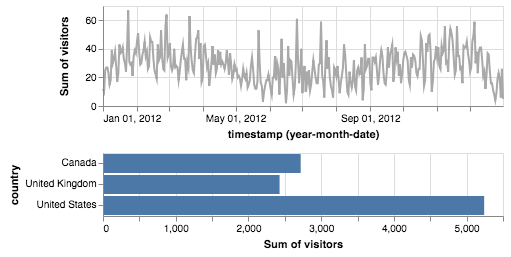

In [5]:
interval = alt.selection_interval(encodings=['x'],fields=['timestamp:T'])

timeline = alt.Chart(pageviews).mark_line().encode(
    x = alt.X('timestamp:T', timeUnit='yearmonthdate'),
    y = 'sum(visitors):Q',
    color = alt.value('darkgray')
).properties(
    height = 100
).add_selection(
    interval
)

bar = alt.Chart(pageviews).mark_bar().encode(
    x = 'sum(visitors):Q',
    y = 'country:N'
).transform_filter(
    interval
)

timeline & bar

## Save interactive visualizations to an HTML file

It's easy to save this interactive pair to an HTML file. *But, note that even though we're operating the notebook with* `alt.data_transformers.enable('json')` **this file will still have the data embedded in the HTML page text!** Enabling the JSON data_transformers just affected the notebook operation.

The advantage to this method is that you can just double-click on the HTML file, opening it in a web browser, to view and interact with the visualizations.

In [6]:
(timeline & bar).save('timeline_and_bar.html')

## Save the data out to a JSON file that Altair can read

If you want the HTML visualizations to read in the data from a separate JSON file, you need to save the data in the proper format, and then feed that URL (here just a file name) into the Altair `Chart()` instead of feeding in the Pandas DataFrame.

*Note that this is also a solution for bogging down your Jupyter notebooks, and for getting around the MaxRowsError!*

**See the caveat below, though, for how you can view this visualization!**

In [7]:
URL = 'libsmalldata.json'
pageviews.to_json(URL, orient='records')

In [8]:
interval = alt.selection_interval(encodings=['x'],fields=['timestamp:T'])

timeline = alt.Chart(URL).mark_line().encode(
    x = alt.X('timestamp:T', timeUnit='yearmonthdate'),
    y = 'sum(visitors):Q',
    color = alt.value('darkgray')
).properties(
    height = 100
).add_selection(
    interval
)

bar = alt.Chart(URL).mark_bar().encode(
    x = 'sum(visitors):Q',
    y = 'country:N'
).transform_filter(
    interval
)

output_charts = timeline & bar
output_charts.save('timeline_bar_data_separate.html')

## Viewing this HTML visualization

If you look at the contents of that HTML file it references the JSON file to grab the data. **With this type of file reference, though, you can't just double-click on the HTML file to open it in a browser and see the visualization** because you'll get something like this error:

```
Fetch API cannot load
file:///Users/emonson/libsmalldata.json. 
URL scheme must be "http" or "https" for CORS request.
```

Grabbing a local file is considered a [CORS request](https://en.wikipedia.org/wiki/Cross-origin_resource_sharing) in this scenario, and so for security reasons it isn't executed. 

What you have to do to view the interactive visualization is to put it (and the JSON data file) on a web server and view it through your browser from that server's URL. 

If you don't have easy access to a web server, you can run a temporary one locally by going into the directory with the files in a terminal on the Mac, or in the Anaconda prompt on Windows, and type:

```
python -m http.server
```

That should print out a message saying:

```
Serving HTTP on 0.0.0.0 port 8000 (http://0.0.0.0:8000/) …
```

which means you can go to http://0.0.0.0:8000/ in your browser and see the current directory. Click on the HTML file you want to view and the visualization should work fine.

### This doesn't hide your data from users!

This still isn't a solution if you wish to have the visualization accessible but not the data! People could look at the source text of the HTML page and see the name of the JSON data file and just type it into their browser and view it.

*With Altair, the visualization is getting rendered on the client's / viewer's device, so the data must be accessible from the client machine, which means it's not secure!*

**In the end, if you want or need to restrict access to the data, you need to put both the visualization and the data behind authentication so only the right people can see both!**
